In [1]:
from stable_baselines3 import DDPG, DQN, A2C
from Landscape import Region
from enviorment import GPSD_ENV
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np 
import torch 
from stable_baselines3.dqn.policies import QNetwork
from stable_baselines3.common.env_checker import check_env
landscape = Region((103.809643,1.243246,103.904400,1.325623), hex_size=25, years=[2018]) 


/opt/anaconda3/envs/research/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/s

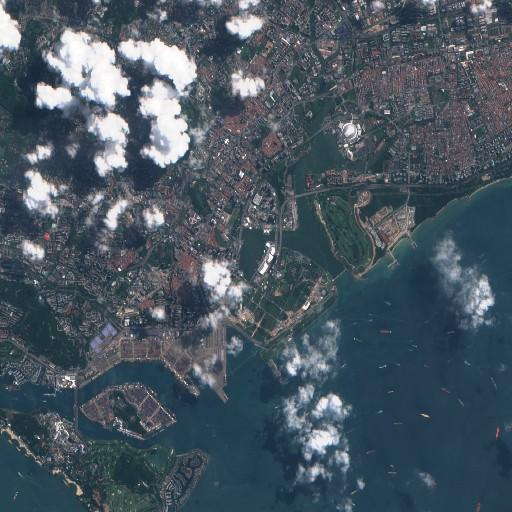

In [2]:
landscape.images[2018].Input_Image.image

In [22]:
import importlib
import Landscape
import enviorment 
import stable_baselines3
import tracker
Landscape = importlib.reload(Landscape)
enviorment = importlib.reload(enviorment)
tracker = importlib.reload(tracker)


stable_baselines3 = importlib.reload(stable_baselines3)
track = tracker.Tracker(landscape.images[2018].Input_Image.num_hexes_width,landscape.images[2018].Input_Image.num_hexes_height)
env = enviorment.GPSD_ENV(landscape.images[2018], start_position=None, target_position=[3,3], tracker = track)
check_env(env, warn=True)

/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D 

In [23]:
import math
from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv


track.clear()
offset = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# # Create the model
# vec_env = DummyVecEnv([lambda: env])  # Create a DummyVecEnv

# # Optionally normalize the environment (set normalize_images=False)
# normalized_env = VecNormalize(vec_env, norm_obs=True, norm_reward=True, clip_obs=10.0)


model = DQN(
    policy="MlpPolicy",
    env=env,
    learning_rate=1e-4,
    buffer_size=100000,
    batch_size=32,
    gamma=0.99,
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01,
    exploration_fraction=0.1,
    target_update_interval=10000,
    learning_starts=10000,
    max_grad_norm=10,
    train_freq=4,
    verbose=0
)

model.learn(total_timesteps=500000, progress_bar = False)
model.save("DQN_test")



Using device: cpu


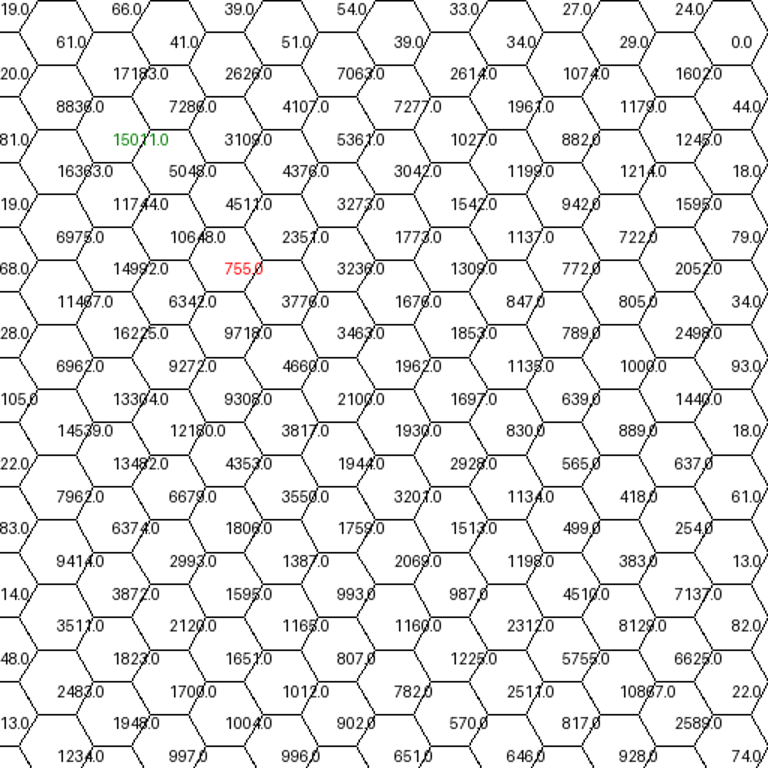

In [24]:

from PIL import Image, ImageDraw
from helper import hex_corner
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height+1):
      for r in range(env.size_width+1):
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            val = round(track.arr[r,q],2)
            draw.polygon(corners, outline="black")
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='left')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='left')
            else:
                  draw.text((x,y), str(val), fill='black', align='left')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

/var/folders/2v/9rjk2f_n3pgd38k9vyj_8_tw0000gn/T/ipykernel_22629/2182963252.py:3: RuntimeWarning: invalid value encountered in divide
  rew = track.reward_back / track.arr


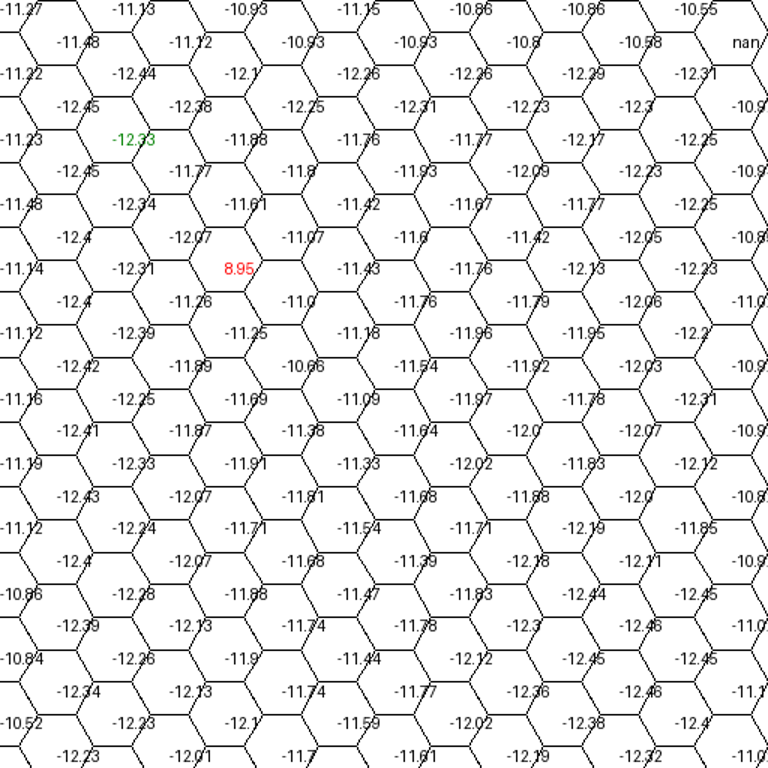

In [25]:

from PIL import Image, ImageDraw
from helper import hex_corner
rew = track.reward_back / track.arr
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height+1):
      for r in range(env.size_width+1):
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            val = round(rew[r,q],2)
            draw.polygon(corners, outline="black")
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='center')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='center')
            else:
                  draw.text((x,y), str(val), fill='black', align='center')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

/var/folders/2v/9rjk2f_n3pgd38k9vyj_8_tw0000gn/T/ipykernel_22629/1571681683.py:3: RuntimeWarning: invalid value encountered in divide
  rew = track.reward_back / track.arr


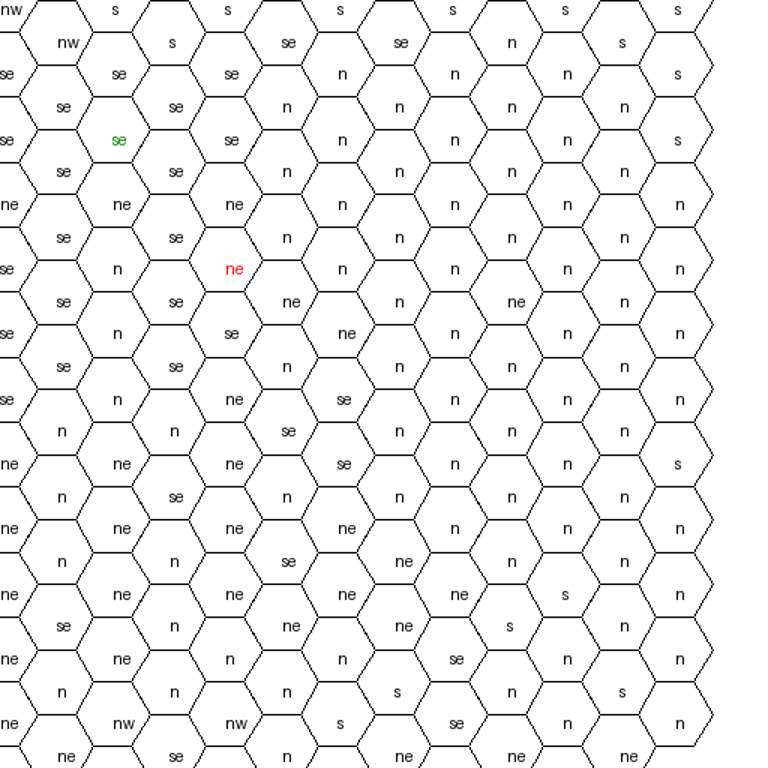

In [33]:

from PIL import Image, ImageDraw
from helper import hex_corner
rew = track.reward_back / track.arr
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height):
      for r in range(env.size_width):
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            val = model.predict(np.array(env.area.Input_Image.hexagon_images[q][r].cropped_image.convert("L")))[0]
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            draw.polygon(corners, outline="black")
            if (val == 0):
                  val = 'ne'
            elif (val == 1):
                  val = 'se'
            elif (val == 2):
                  val = 'nw'
            elif (val == 3):
                  val = 'sw'
            elif (val == 4):
                  val = 's'
            elif (val == 5):
                  val = 'n'
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='center')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='center')
            else:
                  draw.text((x,y), str(val), fill='black', align='center')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

/var/folders/2v/9rjk2f_n3pgd38k9vyj_8_tw0000gn/T/ipykernel_22629/2107939854.py:3: RuntimeWarning: invalid value encountered in divide
  rew = track.reward_back / track.arr


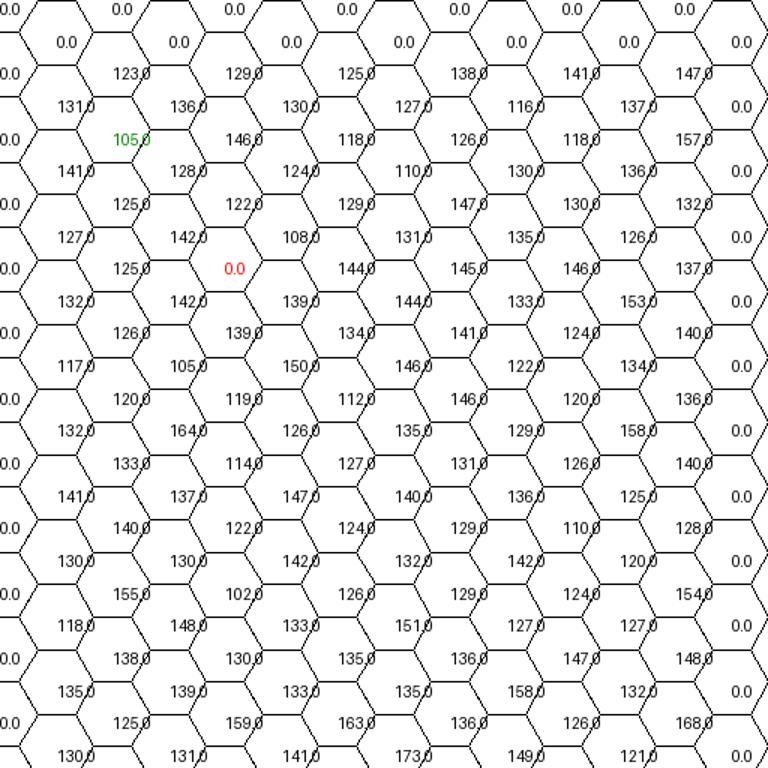

In [34]:

from PIL import Image, ImageDraw
from helper import hex_corner
rew = track.reward_back / track.arr
img = Image.new('RGB',(env.area.Input_Image.image.size), color= 'white')
draw = ImageDraw.Draw(img)
for q in range(env.size_height+1):
      for r in range(env.size_width+1):
      
      # Calculate hexagon center position
            x = r * (env.hex_width - (math.cos(1.0472) * env.area.Input_Image.hex_radius)) 

            y = q * (env.hex_height) + ((r%2) * math.sin(1.0472) * env.area.Input_Image.hex_radius)

            # Draw hexagon
            corners = [hex_corner((x,y), env.area.Input_Image.hex_radius, i) for i in range(6)]
            val = round(track.start[r,q],2)
            draw.polygon(corners, outline="black")
            if( (r,q) == (1+offset,1+offset)):
                  draw.text((x,y), str(val), fill='green', align='center')
            elif((r,q) == (3+offset,3+offset)):
                  draw.text((x,y), str(val), fill='red', align='center')
            else:
                  draw.text((x,y), str(val), fill='black', align='center')
                  
            
display(img.resize((round(env.area.Input_Image.image.size[0] * 1.5), round(env.area.Input_Image.image.size[1] * 1.5))))
      

In [36]:
vals = []
suc = []
for i in range(1000):
      env.reset()
      terminated = False
      run_reward = 0
      while not terminated:
            action = model.predict(env._get_obs())
            observation, reward, terminated, k, info  = env.step(int(action[0]))
            run_reward += reward
      vals.append(run_reward)
      suc.append(info['SUCESS'])
np.asarray(suc).mean(), np.asarray(run_reward).mean(), np.asarray(run_reward).min(), np.asarray(run_reward).max()


(0.002, -12.5, -12.5, -12.5)

In [16]:
# env = enviorment.GPSD_ENV(landscape.images[2018], render='human', start_position=[1,1], target_position=[3,3])
# env.reset()
# env.render()
# input_text = ''
# while input_text == '':
#       action = int(model.predict(env._get_obs())[0])
#       print(action)
#       print(env._agent_location)
#       print(env.area.target_locatation)
      
#       input_text = input("Input")
#       observation, reward, terminated, k, info = env.step(action)
#       print(terminated)
#       if(terminated):
#             input_text='ji'
# env.close()